<a href="https://colab.research.google.com/github/Celinekimm/Analysis-on-COVID-19/blob/main/MNIST_practice_0315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"celinekimm","key":"630b296d45ca5cf3ebaf62d509301685"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [28]:
!kaggle kernels output anandad/classify-fashion-mnist-with-vgg16 -p /path/to/dest

Output file downloaded to /path/to/dest/test_features.npz
Output file downloaded to /path/to/dest/train_features.npz
Output file downloaded to /path/to/dest/val_features.npz
Kernel log downloaded to /path/to/dest/classify-fashion-mnist-with-vgg16.log 


In [32]:
import numpy as np 
import pandas as pd 
import os, time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16;
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

In [12]:
from google.colab import files
files.upload()

Saving fashion-mnist-master.zip to fashion-mnist-master.zip


In [15]:
!unzip fashion-mnist-master.zip -d fashion-mnist-master

Archive:  fashion-mnist-master.zip
3a25339d53c5d2a6a713c6467f17b37332aae507
   creating: fashion-mnist-master/fashion-mnist-master/
  inflating: fashion-mnist-master/fashion-mnist-master/.catwatch.yaml  
 extracting: fashion-mnist-master/fashion-mnist-master/.dockerignore  
  inflating: fashion-mnist-master/fashion-mnist-master/.gitignore  
  inflating: fashion-mnist-master/fashion-mnist-master/.zappr.yaml  
  inflating: fashion-mnist-master/fashion-mnist-master/CONTRIBUTING.md  
  inflating: fashion-mnist-master/fashion-mnist-master/Dockerfile  
  inflating: fashion-mnist-master/fashion-mnist-master/LICENSE  
  inflating: fashion-mnist-master/fashion-mnist-master/MAINTAINERS  
  inflating: fashion-mnist-master/fashion-mnist-master/README.ja.md  
  inflating: fashion-mnist-master/fashion-mnist-master/README.md  
  inflating: fashion-mnist-master/fashion-mnist-master/README.zh-CN.md  
  inflating: fashion-mnist-master/fashion-mnist-master/app.py  
   creating: fashion-mnist-master/fashi

In [25]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [26]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

In [27]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [28]:
xtrain.shape

(60000, 28, 28)

In [29]:
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [30]:
x_train/=255
x_test/=255

In [31]:
from tensorflow import keras
y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [32]:
model=Sequential()
model.add(Dense(784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history=model.fit(x_train,y_train,batch_size=20000,epochs=10,validation_split=0.1)
loss,acc=model.evaluate(x_test,y_test)

Epoch 1/10
3/3 [==============================] - 3s 182ms/step - loss: 1.8885 - accuracy: 0.3680 - val_loss: 1.1531 - val_accuracy: 0.6662
Epoch 2/10
3/3 [==============================] - 0s 78ms/step - loss: 1.0383 - accuracy: 0.6589 - val_loss: 0.7963 - val_accuracy: 0.7438
Epoch 3/10
3/3 [==============================] - 0s 75ms/step - loss: 0.7823 - accuracy: 0.7331 - val_loss: 0.6822 - val_accuracy: 0.7568
Epoch 4/10
3/3 [==============================] - 0s 84ms/step - loss: 0.6866 - accuracy: 0.7564 - val_loss: 0.6255 - val_accuracy: 0.7908
Epoch 5/10
3/3 [==============================] - 0s 73ms/step - loss: 0.6291 - accuracy: 0.7878 - val_loss: 0.5860 - val_accuracy: 0.7968
Epoch 6/10
3/3 [==============================] - 0s 71ms/step - loss: 0.5943 - accuracy: 0.7954 - val_loss: 0.5509 - val_accuracy: 0.8078
Epoch 7/10
3/3 [==============================] - 0s 75ms/step - loss: 0.5521 - accuracy: 0.8103 - val_loss: 0.5247 - val_accuracy: 0.8148
Epoch 8/10
3/3 [==========

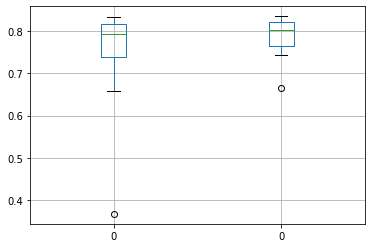

In [34]:
ta=pd.DataFrame(history.history['accuracy'])
va=pd.DataFrame(history.history['val_accuracy'])
tva=pd.concat([ta,va],axis=1)
tva.boxplot()

In [35]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.827
Loss: 0.499


In [36]:
y_predict = model.predict(x_test)
np.argmax(y_predict[0])
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

In [37]:
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[764   9  13  59   4   1 131   0  19   0]
 [  6 943   9  30   5   0   5   0   2   0]
 [ 12   2 742  14 144   1  73   0  12   0]
 [ 28  19  10 845  50   1  43   0   4   0]
 [  0   2 125  35 747   0  85   0   6   0]
 [  1   0   0   1   0 891   0  53   3  51]
 [120   5 142  41 103   0 562   0  27   0]
 [  0   0   0   0   0  43   0 894   0  63]
 [  1   2  11   7   2   6  23   7 941   0]
 [  0   0   0   0   0  15   2  39   1 943]]
